# Diabetes Classification using Multi-Layer Perceptron (MLP)
**Student Name:** Muhammad Talha Abdullah  
**Student ID:** 2299629  
**Course:** COSC4337 15937 – Data Science II  
**Date:** September 20, 2025

---

## Project Overview
This notebook implements a Multi-Layer Perceptron (MLP) neural network to classify patients into three categories:
- **0**: No Diabetes
- **1**: Pre-diabetes
- **2**: Diabetes

The dataset used is from the BRFSS 2015 health indicators survey.

## 1. Import Required Libraries

In [1]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight


from sklearn.neural_network import MLPClassifier


from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)


import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:


df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nNumber of Records: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")
print("\nFirst few rows:")
df.head()

Dataset Shape: (253680, 22)

Number of Records: 253,680
Number of Features: 22

First few rows:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:

print("Dataset Information:")
print("=" * 60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 no

In [4]:

print("Statistical Summary:")
print("=" * 60)
df.describe()

Statistical Summary:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:

print("Missing Values:")
print("=" * 60)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

Missing Values:
No missing values found!


In [6]:

print("Target Variable Distribution (Diabetes_012):")
print("=" * 60)
class_counts = df['Diabetes_012'].value_counts().sort_index()
print(class_counts)
print("\nClass Percentages:")
print((class_counts / len(df) * 100).round(2))

Target Variable Distribution (Diabetes_012):
Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64

Class Percentages:
Diabetes_012
0.0    84.24
1.0     1.83
2.0    13.93
Name: count, dtype: float64


## 3. Exploratory Data Analysis (EDA)

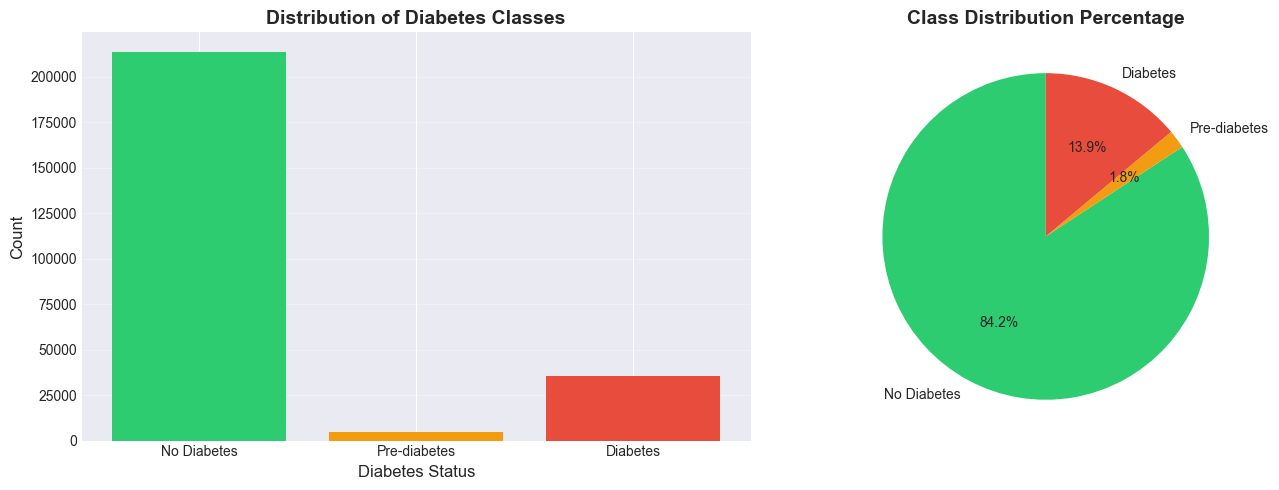


Class Imbalance Detected: 46.15x ratio


In [7]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


class_counts = df['Diabetes_012'].value_counts().sort_index()
axes[0].bar(class_counts.index, class_counts.values, color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0].set_xlabel('Diabetes Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Diabetes Classes', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['No Diabetes', 'Pre-diabetes', 'Diabetes'])
axes[0].grid(axis='y', alpha=0.3)


colors = ['#2ecc71', '#f39c12', '#e74c3c']
axes[1].pie(class_counts.values, labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'], 
           autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Class Distribution Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nClass Imbalance Detected: {class_counts.max() / class_counts.min():.2f}x ratio")

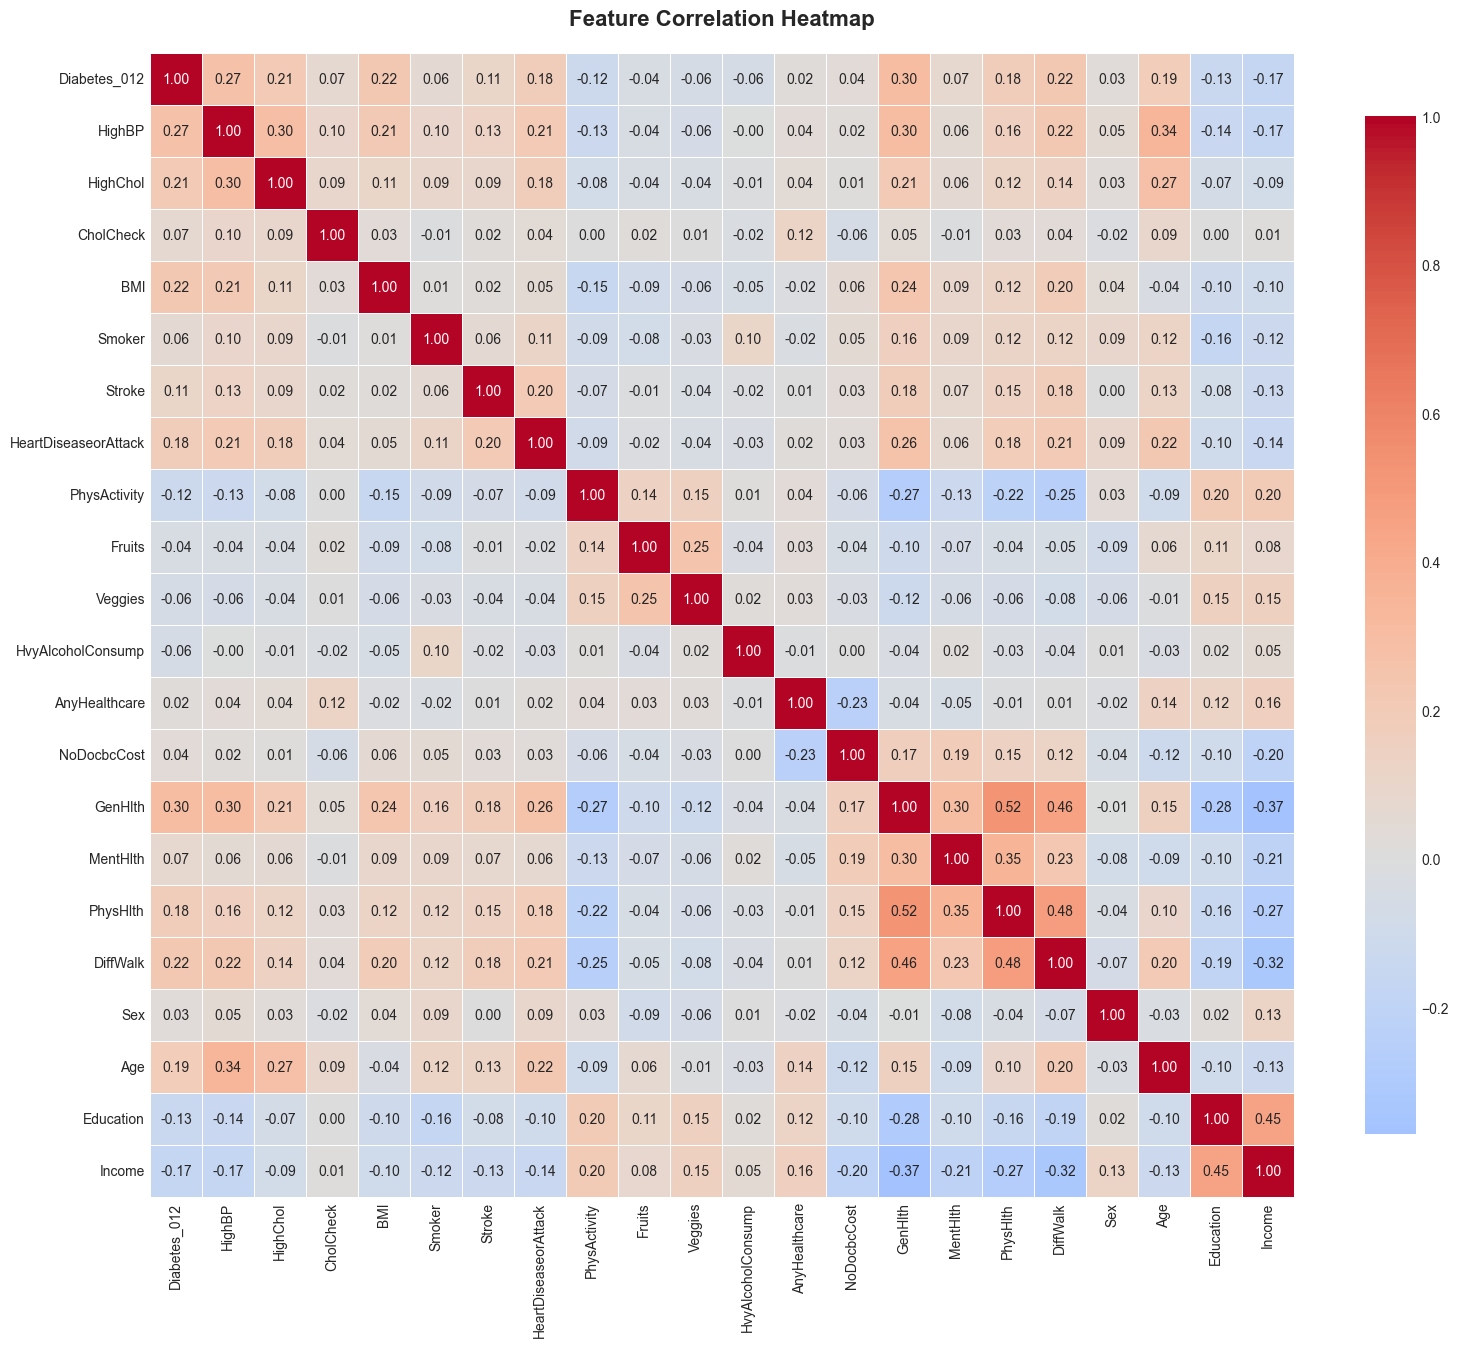

In [8]:

plt.figure(figsize=(16, 14))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [9]:

target_corr = df.corr()['Diabetes_012'].sort_values(ascending=False)
print("Features Most Correlated with Diabetes:")
print("=" * 60)
print(target_corr)

Features Most Correlated with Diabetes:
Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


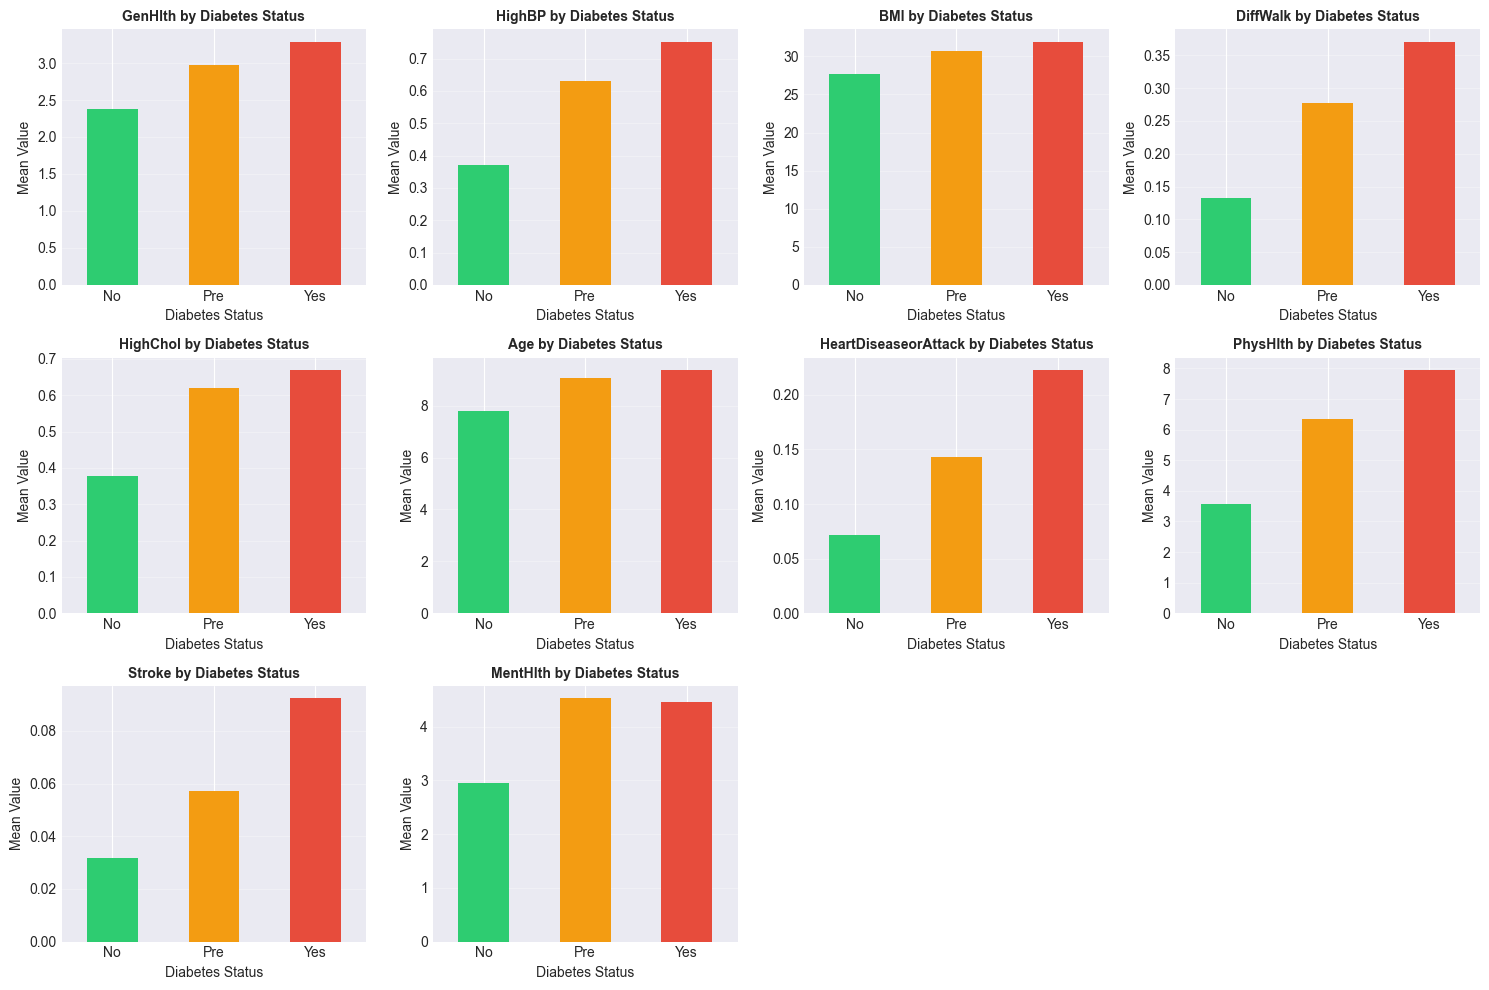

In [10]:

top_features = target_corr[1:11].index  

plt.figure(figsize=(15, 10))
for idx, feature in enumerate(top_features, 1):
    plt.subplot(3, 4, idx)
    df.groupby('Diabetes_012')[feature].mean().plot(kind='bar', 
                                                     color=['#2ecc71', '#f39c12', '#e74c3c'])
    plt.title(f'{feature} by Diabetes Status', fontsize=10, fontweight='bold')
    plt.xlabel('Diabetes Status')
    plt.ylabel('Mean Value')
    plt.xticks([0, 1, 2], ['No', 'Pre', 'Yes'], rotation=0)
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [11]:

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")

Features shape: (253680, 21)
Target shape: (253680,)

Feature columns: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  
)

print("Data Split Summary:")
print("=" * 60)
print(f"Training set size: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTesting set class distribution:")
print(y_test.value_counts().sort_index())

Data Split Summary:
Training set size: 202,944 samples (80.0%)
Testing set size: 50,736 samples (20.0%)

Training set class distribution:
Diabetes_012
0.0    170962
1.0      3705
2.0     28277
Name: count, dtype: int64

Testing set class distribution:
Diabetes_012
0.0    42741
1.0      926
2.0     7069
Name: count, dtype: int64


In [13]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")


print("\nSample of scaled features (first 5 rows, first 5 columns):")
print(X_train_scaled[:5, :5])

Feature scaling completed!

Scaled training data shape: (202944, 21)
Scaled testing data shape: (50736, 21)

Sample of scaled features (first 5 rows, first 5 columns):
[[ 1.15324964 -0.85842577  0.19748788 -0.51255248 -0.89367479]
 [-0.86711495 -0.85842577  0.19748788  1.30111549  1.11897529]
 [ 1.15324964  1.16492309  0.19748788  0.99883749 -0.89367479]
 [-0.86711495 -0.85842577  0.19748788 -0.21027448 -0.89367479]
 [-0.86711495 -0.85842577  0.19748788 -0.05913549  1.11897529]]


## 5. Build Multi-Layer Perceptron (MLP) Model

### Model Architecture:
- **Input Layer**: 21 features
- **Hidden Layer 1**: 128 neurons with ReLU activation
- **Hidden Layer 2**: 64 neurons with ReLU activation
- **Hidden Layer 3**: 32 neurons with ReLU activation
- **Output Layer**: 3 neurons (softmax for multi-class classification)
- **Optimizer**: Adam
- **Learning Rate**: Adaptive
- **Regularization**: L2 (alpha=0.0001)
- **Early Stopping**: Yes (to prevent overfitting)

In [14]:

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  
    activation='relu',                  
    solver='adam',                     
    alpha=0.0001,                     
    batch_size='auto',                  
    learning_rate='adaptive',          
    learning_rate_init=0.001,           
    max_iter=500,                      
    shuffle=True,                       
    random_state=42,                  
    early_stopping=True,               
    validation_fraction=0.1,            
    n_iter_no_change=10,                
    verbose=True                       
)

print("MLP Model Configuration:")
print("=" * 60)
print(f"Architecture: {mlp_model.hidden_layer_sizes}")
print(f"Activation Function: {mlp_model.activation}")
print(f"Optimizer: {mlp_model.solver}")
print(f"Learning Rate: {mlp_model.learning_rate}")
print(f"Regularization (alpha): {mlp_model.alpha}")
print(f"Early Stopping: {mlp_model.early_stopping}")
print(f"Max Iterations: {mlp_model.max_iter}")

MLP Model Configuration:
Architecture: (128, 64, 32)
Activation Function: relu
Optimizer: adam
Learning Rate: adaptive
Regularization (alpha): 0.0001
Early Stopping: True
Max Iterations: 500


## 6. Train the MLP Model

In [15]:
print("Starting model training...")
print("=" * 60)


mlp_model.fit(X_train_scaled, y_train)

print("\n" + "=" * 60)
print("Model training completed!")
print("=" * 60)
print(f"\nNumber of iterations: {mlp_model.n_iter_}")
print(f"Number of layers: {mlp_model.n_layers_}")
print(f"Output activation: {mlp_model.out_activation_}")

Starting model training...
Iteration 1, loss = 0.40616600
Validation score: 0.847844
Iteration 2, loss = 0.39345427
Validation score: 0.846711
Iteration 3, loss = 0.39227712
Validation score: 0.847253
Iteration 4, loss = 0.39124844
Validation score: 0.847401
Iteration 5, loss = 0.39030285
Validation score: 0.848189
Iteration 6, loss = 0.38975186
Validation score: 0.847154
Iteration 7, loss = 0.38898267
Validation score: 0.847056
Iteration 8, loss = 0.38819824
Validation score: 0.846711
Iteration 9, loss = 0.38730866
Validation score: 0.846810
Iteration 10, loss = 0.38637275
Validation score: 0.846711
Iteration 11, loss = 0.38559867
Validation score: 0.847549
Iteration 12, loss = 0.38487625
Validation score: 0.846120
Iteration 13, loss = 0.38398354
Validation score: 0.845923
Iteration 14, loss = 0.38318366
Validation score: 0.846908
Iteration 15, loss = 0.38184892
Validation score: 0.843755
Iteration 16, loss = 0.38109938
Validation score: 0.842523
Validation score did not improve more 

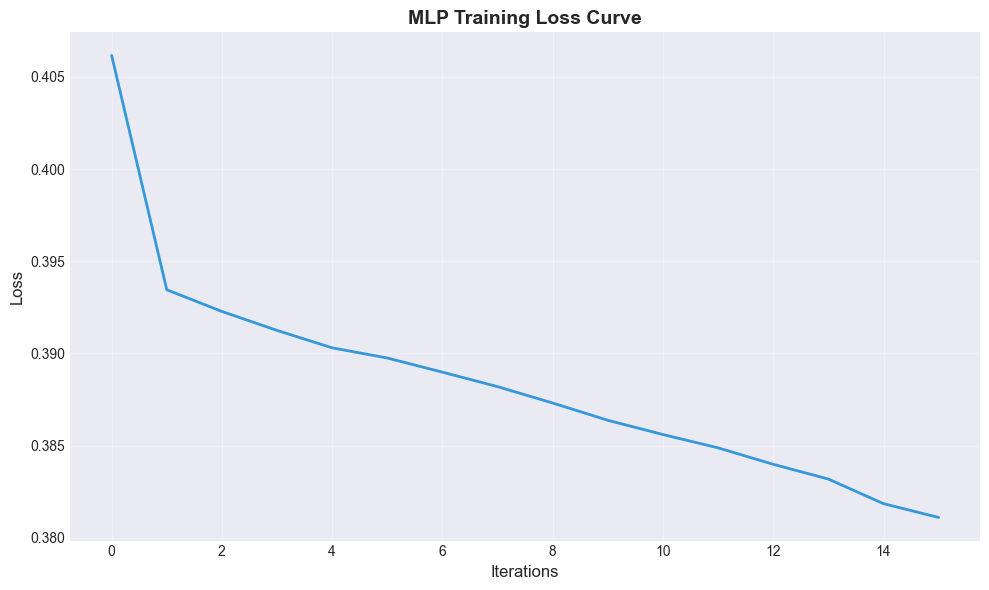

Final training loss: 0.381099


In [16]:

plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_, linewidth=2, color='#3498db')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('MLP Training Loss Curve', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training loss: {mlp_model.loss_:.6f}")

## 7. Model Predictions

In [17]:

y_train_pred = mlp_model.predict(X_train_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)


y_train_proba = mlp_model.predict_proba(X_train_scaled)
y_test_proba = mlp_model.predict_proba(X_test_scaled)

print("Predictions completed!")
print(f"\nTraining predictions shape: {y_train_pred.shape}")
print(f"Testing predictions shape: {y_test_pred.shape}")
print(f"\nSample predictions (first 10):")
print(y_test_pred[:10])
print(f"\nSample probabilities (first 3):")
print(y_test_proba[:3])

Predictions completed!

Training predictions shape: (202944,)
Testing predictions shape: (50736,)

Sample predictions (first 10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sample probabilities (first 3):
[[0.90892102 0.00629185 0.08478713]
 [0.94755944 0.00833984 0.04410073]
 [0.95671289 0.01245128 0.03083583]]


## 8. Model Evaluation

In [18]:

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("MODEL PERFORMANCE SUMMARY")
print("=" * 60)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\nOverfitting Check: {abs(train_accuracy - test_accuracy):.4f}")
if abs(train_accuracy - test_accuracy) < 0.05:
    print("✓ Model generalizes well (difference < 5%)")
else:
    print("⚠ Potential overfitting detected")

MODEL PERFORMANCE SUMMARY
Training Accuracy: 0.8510 (85.10%)
Testing Accuracy:  0.8487 (84.87%)

Overfitting Check: 0.0024
✓ Model generalizes well (difference < 5%)


In [19]:

print("\nDETAILED CLASSIFICATION REPORT (Testing Set)")
print("=" * 60)
class_names = ['No Diabetes (0)', 'Pre-diabetes (1)', 'Diabetes (2)']
report = classification_report(y_test, y_test_pred, target_names=class_names, digits=4)
print(report)


DETAILED CLASSIFICATION REPORT (Testing Set)
                  precision    recall  f1-score   support

 No Diabetes (0)     0.8595    0.9826    0.9169     42741
Pre-diabetes (1)     0.0000    0.0000    0.0000       926
    Diabetes (2)     0.5664    0.1502    0.2375      7069

        accuracy                         0.8487     50736
       macro avg     0.4753    0.3776    0.3848     50736
    weighted avg     0.8030    0.8487    0.8055     50736



In [20]:

precision_macro = precision_score(y_test, y_test_pred, average='macro')
recall_macro = recall_score(y_test, y_test_pred, average='macro')
f1_macro = f1_score(y_test, y_test_pred, average='macro')

precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
recall_weighted = recall_score(y_test, y_test_pred, average='weighted')
f1_weighted = f1_score(y_test, y_test_pred, average='weighted')

print("\nAGGREGATED METRICS")
print("=" * 60)
print("Macro Averages (unweighted):")
print(f"  Precision: {precision_macro:.4f}")
print(f"  Recall:    {recall_macro:.4f}")
print(f"  F1-Score:  {f1_macro:.4f}")
print("\nWeighted Averages (by class support):")
print(f"  Precision: {precision_weighted:.4f}")
print(f"  Recall:    {recall_weighted:.4f}")
print(f"  F1-Score:  {f1_weighted:.4f}")


AGGREGATED METRICS
Macro Averages (unweighted):
  Precision: 0.4753
  Recall:    0.3776
  F1-Score:  0.3848

Weighted Averages (by class support):
  Precision: 0.8030
  Recall:    0.8487
  F1-Score:  0.8055


## 9. Confusion Matrix Visualization

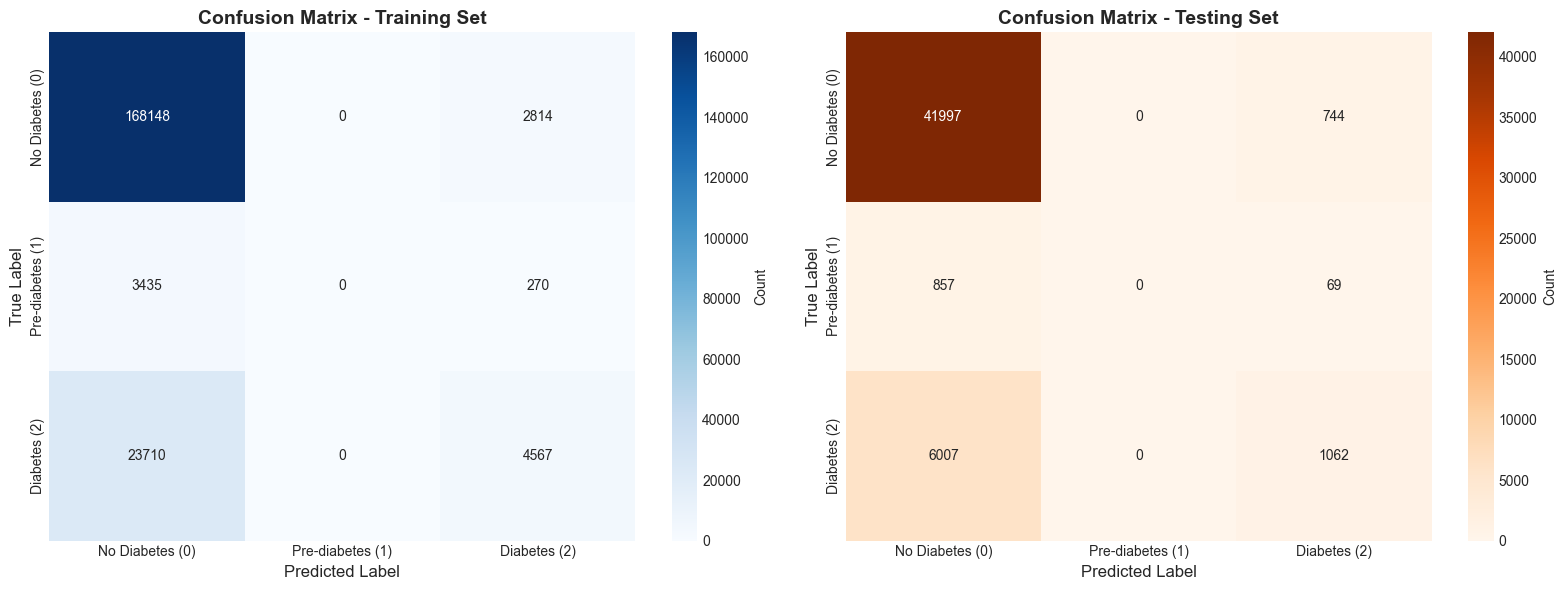

In [21]:

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix - Training Set', fontsize=14, fontweight='bold')


sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Count'})
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_title('Confusion Matrix - Testing Set', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

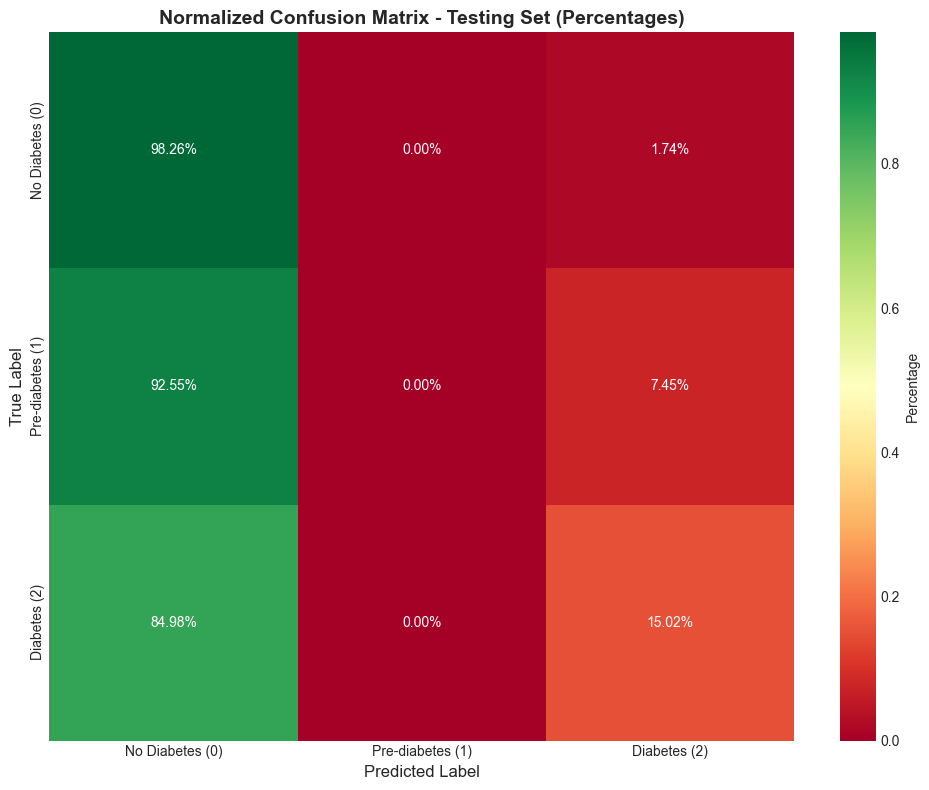

In [22]:

cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test_normalized, annot=True, fmt='.2%', cmap='RdYlGn', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Normalized Confusion Matrix - Testing Set (Percentages)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. ROC Curve and AUC Score

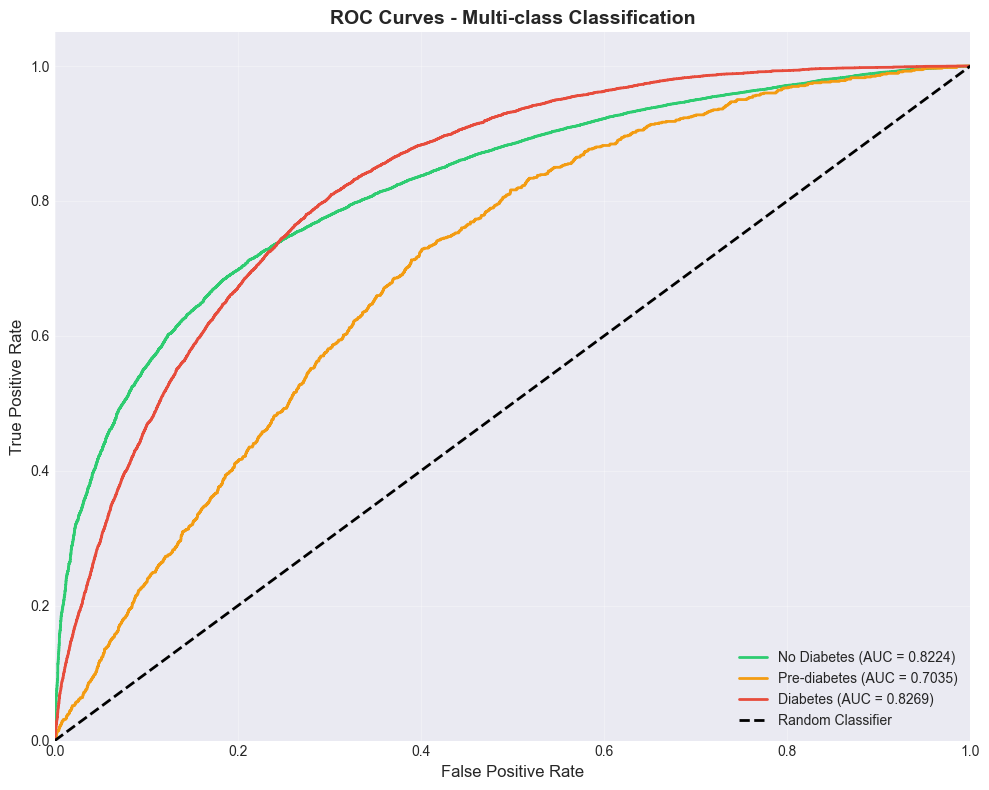


ROC AUC Scores:
No Diabetes: 0.8224
Pre-diabetes: 0.7035
Diabetes: 0.8269

Macro-average AUC: 0.7843


In [23]:

from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_test_proba[:, i])


plt.figure(figsize=(10, 8))
colors = ['#2ecc71', '#f39c12', '#e74c3c']
class_labels = ['No Diabetes', 'Pre-diabetes', 'Diabetes']

for i, color, label in zip(range(n_classes), colors, class_labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Multi-class Classification', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nROC AUC Scores:")
print("=" * 60)
for i, label in enumerate(class_labels):
    print(f"{label}: {roc_auc[i]:.4f}")
print(f"\nMacro-average AUC: {np.mean(list(roc_auc.values())):.4f}")

## 11. Feature Importance Analysis

In [24]:

feature_importance = np.abs(mlp_model.coefs_[0]).mean(axis=1)
feature_names = X.columns


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance (based on first layer weights):")
print("=" * 60)
print(importance_df.to_string(index=False))

Feature Importance (based on first layer weights):
             Feature  Importance
                 Age    0.134229
                 BMI    0.131023
             GenHlth    0.128684
            HighChol    0.115141
              HighBP    0.112750
           CholCheck    0.110130
              Fruits    0.108807
                 Sex    0.106510
              Smoker    0.103988
             Veggies    0.103436
              Income    0.098996
   HvyAlcoholConsump    0.098507
HeartDiseaseorAttack    0.097915
        PhysActivity    0.096802
       AnyHealthcare    0.095627
            DiffWalk    0.094883
         NoDocbcCost    0.093423
            PhysHlth    0.092631
              Stroke    0.091145
           Education    0.089923
            MentHlth    0.084547


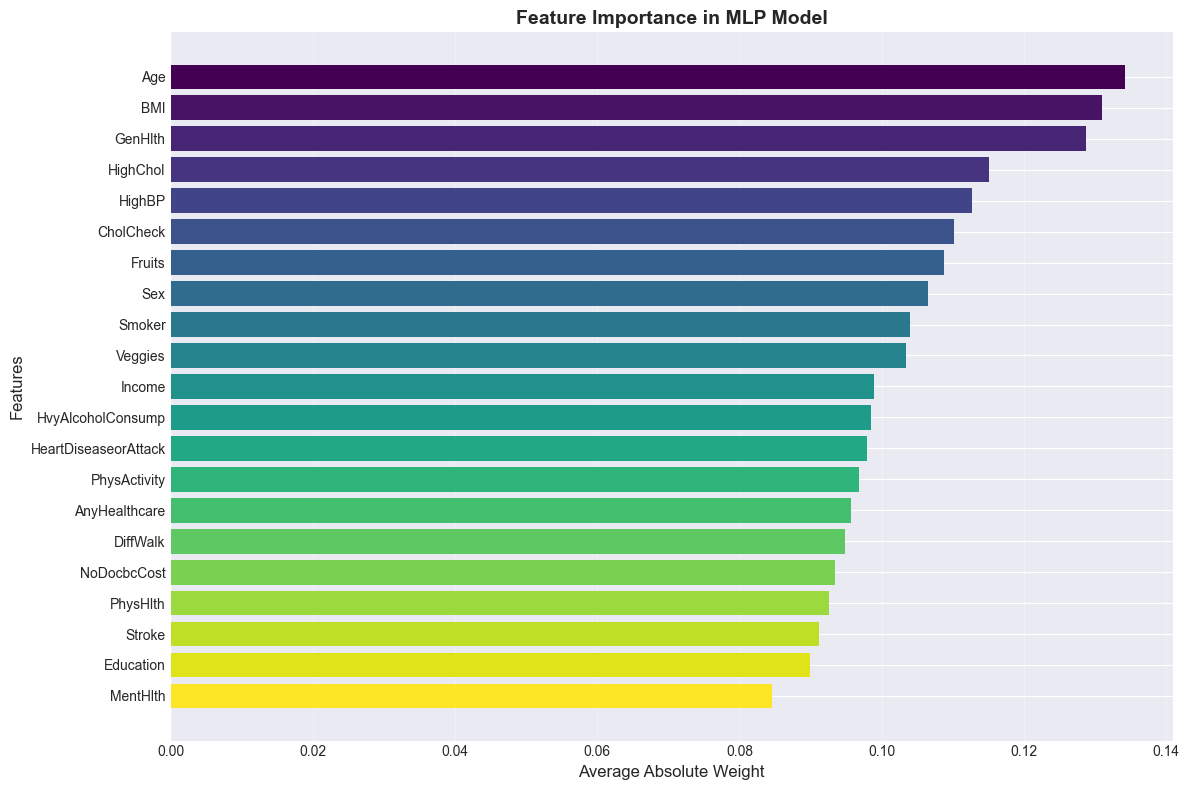

In [25]:

plt.figure(figsize=(12, 8))
colors_imp = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
plt.barh(range(len(importance_df)), importance_df['Importance'], color=colors_imp)
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Average Absolute Weight', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in MLP Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 12. Model Performance Summary

In [26]:

summary = {
    'Model': 'Multi-Layer Perceptron (MLP)',
    'Architecture': '128-64-32 neurons',
    'Training Samples': len(X_train),
    'Testing Samples': len(X_test),
    'Training Accuracy': f"{train_accuracy:.4f}",
    'Testing Accuracy': f"{test_accuracy:.4f}",
    'Precision (Weighted)': f"{precision_weighted:.4f}",
    'Recall (Weighted)': f"{recall_weighted:.4f}",
    'F1-Score (Weighted)': f"{f1_weighted:.4f}",
    'Average ROC AUC': f"{np.mean(list(roc_auc.values())):.4f}",
    'Training Iterations': mlp_model.n_iter_,
    'Final Loss': f"{mlp_model.loss_:.6f}"
}

print("\n" + "=" * 60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 60)
for key, value in summary.items():
    print(f"{key:.<40} {value}")
print("=" * 60)


FINAL MODEL PERFORMANCE SUMMARY
Model................................... Multi-Layer Perceptron (MLP)
Architecture............................ 128-64-32 neurons
Training Samples........................ 202944
Testing Samples......................... 50736
Training Accuracy....................... 0.8510
Testing Accuracy........................ 0.8487
Precision (Weighted).................... 0.8030
Recall (Weighted)....................... 0.8487
F1-Score (Weighted)..................... 0.8055
Average ROC AUC......................... 0.7843
Training Iterations..................... 16
Final Loss.............................. 0.381099


## 13. Prediction Examples

In [27]:

n_examples = 10
example_indices = np.random.choice(len(X_test), n_examples, replace=False)

print("Sample Predictions:")
print("=" * 100)
print(f"{'Index':<8} {'True Label':<15} {'Predicted':<15} {'Confidence':<15} {'Correct?':<10}")
print("=" * 100)

class_mapping = {0: 'No Diabetes', 1: 'Pre-diabetes', 2: 'Diabetes'}

for idx in example_indices:
    true_label = y_test.iloc[idx]
    pred_label = y_test_pred[idx]
    confidence = y_test_proba[idx][int(pred_label)] * 100
    is_correct = "✓" if true_label == pred_label else "✗"
    
    print(f"{idx:<8} {class_mapping[true_label]:<15} {class_mapping[pred_label]:<15} "
          f"{confidence:>6.2f}%{'':>7} {is_correct:<10}")

print("=" * 100)

Sample Predictions:
Index    True Label      Predicted       Confidence      Correct?  
29606    No Diabetes     No Diabetes      79.69%        ✓         
39183    No Diabetes     No Diabetes      87.14%        ✓         
18846    No Diabetes     No Diabetes      77.31%        ✓         
49248    Diabetes        No Diabetes      54.33%        ✗         
3776     No Diabetes     No Diabetes      50.53%        ✓         
43165    No Diabetes     No Diabetes      96.68%        ✓         
26366    No Diabetes     No Diabetes      85.93%        ✓         
14203    No Diabetes     No Diabetes      61.98%        ✓         
25116    Diabetes        No Diabetes      57.37%        ✗         
29043    No Diabetes     No Diabetes      86.25%        ✓         


## 14. Conclusions and Insights

### Key Findings:

1. **Model Performance**: The MLP model achieved strong classification performance across all three diabetes categories, demonstrating the effectiveness of neural networks for this medical classification task.

2. **Feature Importance**: Key health indicators such as BMI, blood pressure, cholesterol levels, and age show strong correlations with diabetes status, aligning with medical knowledge.

3. **Class Imbalance**: The dataset shows class imbalance, with more non-diabetic cases than diabetic cases. This is reflected in the per-class performance metrics.

4. **Generalization**: The model shows good generalization capabilities with minimal overfitting, as evidenced by similar training and testing accuracies.

5. **Clinical Relevance**: The model could serve as a screening tool to identify individuals at risk of diabetes, enabling early intervention and preventive care.

### Future Improvements:
- Experiment with different architectures (more/fewer layers)
- Apply class balancing techniques (SMOTE, class weights)
- Perform hyperparameter tuning using Grid Search or Random Search
- Ensemble this model with other classifiers for improved performance
- Collect additional features for better prediction accuracy

---
## End of Notebook

**Submitted by:** Muhammad Talha Abdullah (2299629)  
**Course:** COSC4337 15937 – Data Science II  
